In [1]:
# Jupyter Notebook to grab tweets from twitters api and plot them on a map based on location

In [2]:
install.packages("twitteR", repos="http://cran.us.r-project.org/")
install.packages("ggmap",repos="http://cran.us.r-project.org/")

Installing package into 'C:/Users/Mitch/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'twitteR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Mitch\AppData\Local\Temp\RtmpiG7mcv\downloaded_packages


Installing package into 'C:/Users/Mitch/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'ggmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Mitch\AppData\Local\Temp\RtmpiG7mcv\downloaded_packages


In [3]:
library(twitteR)
library(ggmap)
library(geosphere)

Warning message:
"package 'twitteR' was built under R version 3.3.3"Warning message:
"package 'ggmap' was built under R version 3.3.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Loading required package: sp


In [4]:
# Here is where I would setup the twitter OAuth in order to grab tweets
# I am excluding my API Tokens since these should be private and instead will read
# from the CSV I have written into.

# setup_twitter_oauth("API KEY","API SECRET","ACCESS TOKEN","ACCESS SECRET")
# setup_twitter_oauth("",	"","","")

In [5]:
# Enter Searchterm and number of tweets requested here
# searchTerm <- "a"
# numberOfTweets <- 20
# tweets <- searchTwitter(searchTerm,n=numberOfTweets)

In [6]:
# Writes tweets to CSV file just incase program crashes.
# write.csv(twListToDF(tweets),file='tweets.csv')

# Reads them back into tweets variable.
tweets <- read.csv('tweets.csv')

In [7]:
# Clean Data. The only columns I need are ScreenName
# also change to lowercase and change name
tweets_users = data.frame(tweets$screenName)
colnames(tweets_users) = c('user')

In [8]:
# Convert Dataframe of Screen names to List
userList <- NULL
for(i in 1:nrow(tweets_users)){
   userList[[i]] <- tweets_users[i,1]
}

In [9]:
length(userList)

[1] 20

In [11]:
# lookup users to make sure the users I am searching are still active
#    This is necessary when performing a search on old tweets, or a mass number tweets
#   
 activeUsers <- lookupUsers(userList,includeNA=FALSE)


In [12]:
length(activeUsers)

ERROR: Error in eval(expr, envir, enclos): object 'activeUsers' not found


In [ ]:
# Add All found locations to list
locationList <- NULL
 for(i in activeUsers){
    user <- NULL
    location <-NULL
    user <- i
    location <- user$getLocation()
    locationList <- c(locationList,location)
 }

In [ ]:
locDF <- as.data.frame(locationList)

In [ ]:
head(locDF)
dim(locDF)

In [ ]:
# Write locations to CSV to save them
write.csv(locDF,'locations_found.csv')

In [13]:
# Read them back in as a data frame
DF <- read.csv('locations_found.csv')

In [14]:
data <- data.frame(DF$locationList)

In [15]:
colnames(data) <- c('location')

In [16]:
data$location <- as.character(data$location)

In [17]:
# Google API Limits to 2500 Addresses per day
# So even if you have more locations to get , you may not get them..

for(i in 1:nrow(data)){
    coords = geocode(data[i,1])
    data$lon[i] = as.numeric(coords[1])
    data$lat[i] = as.numeric(coords[2])
}

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brooklyn,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Berkeley%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco,%20CA,%20US&sensor=false


In [18]:
head(data)

location,lon,lat
"San Francisco, CA",-122.41942,37.77493
"California, USA",-119.41793,36.77826
"Brooklyn, NY",-73.94416,40.67818
San Francisco,-122.41942,37.77493
"San Francisco, CA",-122.41942,37.77493
Berkeley CA,-122.27275,37.87159


In [19]:
# REMOVE ALL NA ENTRIES
newData <- na.omit(data)
head(newData)

location,lon,lat
"San Francisco, CA",-122.41942,37.77493
"California, USA",-119.41793,36.77826
"Brooklyn, NY",-73.94416,40.67818
San Francisco,-122.41942,37.77493
"San Francisco, CA",-122.41942,37.77493
Berkeley CA,-122.27275,37.87159


In [20]:
############### TESTING FOR PROBLEM1 SUPERBOWL TOPIC ############################
# To run original plot of #Patriots on 20,000
# Uncomment the read.csv('Loc_With_Lon_Lat_Final.csv') line below
#################################################################################

# Write Valid Locations to CSV File
write.csv(newData,'valid_location_coords.csv')


#Read locations back in as dataframe

# For general approach
data <- read.csv('valid_location_coords.csv')
# For my original locations gathered
#data <- read.csv('Loc_With_Lon_Lat_Final.csv')







#Create a more uniform data frame. Sometimes other columns get
#added when reading from CVS
dataDF <- data.frame(data$lon,data$lat)
colnames(dataDF) <- c('lon','lat')
head(dataDF)

lon,lat
-122.41942,37.77493
-119.41793,36.77826
-73.94416,40.67818
-122.41942,37.77493
-122.41942,37.77493
-122.27275,37.87159


In [21]:
# Categorize the tweets based on proximity to 6 Major US Cities
# LosAngeles
# Dallas
# Boston
# Atlanta
# Denver
# Portland

#############################################################

In [22]:
#Below are counters for each major US City I will track
# Also there is one for NON US
# The idea is for each location get distance from the cities if US
#     Depending on what it is closest to increase that count
# Else, if it is not US, increment that count

# When plotting, I will plot each of the locations, and multiply the size 
# by there values. Most likey needing to divide by some number in order to make 
# it reasonable.

# Will use the geosphere package to measure distances.
# ftp://cran.r-project.org/pub/R/web/packages/geosphere/geosphere.pdf

# The distance from distm will result in meters

# Counters
Count_LosAngeles <- 0
Count_Dallas <- 0
Count_Boston <-0
Count_Atlanta <-0
Count_Denver <- 0
Count_Portland <-0
Count_NonUS <-0

#Lon Lat
Coords_LosAngeles <- c(-118.243683,34.052235)
Coords_Dallas <- c(-96.7970,32.7767)
Coords_Boston <- c(-71.0589,42.3601)
Coords_Atlanta <- c(-84.3880,33.7490)
Coords_Denver <- c(-104.991531,39.742043)
Coords_Portland <- c(-122.6765,45.5231)





In [23]:
# distance <- distm(Coords_LosAngeles,Coords_Dallas,fun=distHaversine)
# distance
# output is 1994217meters. Which is basically correct.

In [24]:
val = dim(dataDF)
NumberOfValidLocations = val[1]
head(dataDF)

lon,lat
-122.41942,37.77493
-119.41793,36.77826
-73.94416,40.67818
-122.41942,37.77493
-122.41942,37.77493
-122.27275,37.87159


In [25]:
c <- 0
while(c <= NumberOfValidLocations){
    
    distancesDF <- data.frame(LA=NA,DAL=NA,BOS=NA,ATL=NA,DEN=NA,POR=NA)
    c <- c + 1
    coords <- c(dataDF[c,1],dataDF[c,2])
    coords <- as.numeric(coords)
    
    #Get Distance to each CITY and put in vector
    distLA  <-  distm(Coords_LosAngeles,coords,fun=distHaversine)
    distDAL <- distm(Coords_Dallas,coords,fun=distHaversine)
    distBOS <- distm(Coords_Boston,coords,fun=distHaversine)
    distATL <- distm(Coords_Atlanta,coords,fun=distHaversine)
    distDEN <- distm(Coords_Denver,coords,fun=distHaversine)
    distPOR <- distm(Coords_Portland,coords,fun=distHaversine)
    
    distances <- c(distLA,distDAL,distBOS,distATL,distDEN,distPOR)
    # LA DA BOS ATL DEN POR
    # 1  2  3   4   5   6
    num <- as.numeric(which.min(distances))
    if(is.na(coords[1])||is.na(coords[2])){
        #Skip all of the below.
    }else{
        if(num == 1){
    Count_LosAngeles = Count_LosAngeles + 1
    }else if(num == 2){
    Count_Dallas = Count_Dallas + 1
    }else if(num == 3){
    Count_Boston = Count_Boston + 1
    }else if(num == 4){
    Count_Atlanta = Count_Atlanta + 1  
    }else if(num == 5){
    Count_Denver = Count_Denver + 1
    }else if(num == 6){
    Count_Portland = Count_Portland + 1
        }
    }
        
}

In [26]:
# Set Circle scale for each city. Divide by 10
Scale_Count_LosAngeles <- Count_LosAngeles %/% 10
Scale_Count_Dallas <- Count_Dallas %/% 10
Scale_Count_Boston <- Count_Boston %/% 10
Scale_Count_Atlanta <- Count_Atlanta %/% 10
Scale_Count_Denver <- Count_Denver %/% 10
Scale_Count_Portland <- Count_Portland %/% 10

In [27]:
#Add major cities to dataframe
majorCitiesDF<- data.frame(city=NA,count=NA,lon=NA,lat=NA,scale=NA)

In [28]:
majorCitiesDF[1,1] <- 'LA'
majorCitiesDF[2,1] <- 'DAL'
majorCitiesDF[3,1] <- 'BOS'
majorCitiesDF[4,1] <- 'ATL'
majorCitiesDF[5,1] <- 'DEN'
majorCitiesDF[6,1] <- 'POR'

majorCitiesDF[1,2] <- Count_LosAngeles
majorCitiesDF[2,2] <- Count_Dallas
majorCitiesDF[3,2] <- Count_Boston
majorCitiesDF[4,2] <- Count_Atlanta
majorCitiesDF[5,2] <- Count_Denver
majorCitiesDF[6,2] <- Count_Portland

majorCitiesDF[1,3:4] <- Coords_LosAngeles
majorCitiesDF[2,3:4] <- Coords_Dallas
majorCitiesDF[3,3:4] <- Coords_Boston
majorCitiesDF[4,3:4] <- Coords_Atlanta
majorCitiesDF[5,3:4] <- Coords_Denver
majorCitiesDF[6,3:4] <- Coords_Portland

#Add Scale to multiply by as well.

majorCitiesDF[1,5] <- Scale_Count_LosAngeles
majorCitiesDF[2,5] <- Scale_Count_Dallas
majorCitiesDF[3,5] <- Scale_Count_Boston
majorCitiesDF[4,5] <- Scale_Count_Atlanta
majorCitiesDF[5,5] <- Scale_Count_Denver
majorCitiesDF[6,5] <- Scale_Count_Portland



In [29]:
center = as.numeric(geocode('United States'))
MAP = ggmap(get_googlemap(center=center,scale=2,zoom=4),extent="normal")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.09024,-95.712891&zoom=4&size=640x640&scale=2&maptype=terrain&sensor=false


In [30]:
NumberOfValidLocations

[1] 8

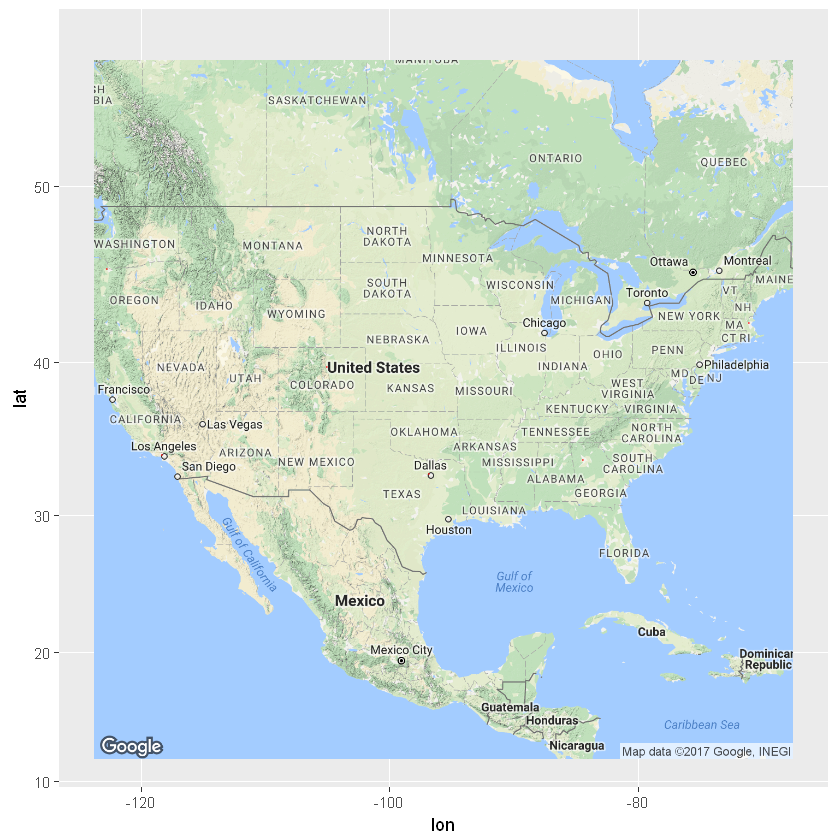

In [31]:
######
# The base_scale is going to depend on valid locations gathered.
# Adjust base scale if circles are not big enough.
# this will all depend on the amount of valid locations.
base_scale <- .5
MAP +
    geom_point(aes(x=lon,y=lat), data=majorCitiesDF,col="red",alpha=0.4,
              size=majorCitiesDF$scale*base_scale) +
    scale_size_continuous(range=range(majorCitiesDF$scale))